In [1]:
# ========================
# IMPORT THƯ VIỆN CẦN THIẾT
# ========================
import math
import numpy as np
import heapq
import matplotlib.pyplot as plt
import networkx as nx
import time
import problem
import importlib
importlib.reload(problem)

from problem import Problem, Node, GraphProblem, Graph, UndirectedGraph

# %matplotlib inline

Tổng số unique path segments: 23


C:\Users\Admin\AppData\Local\Temp\ipykernel_27696\3506273058.py:131: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


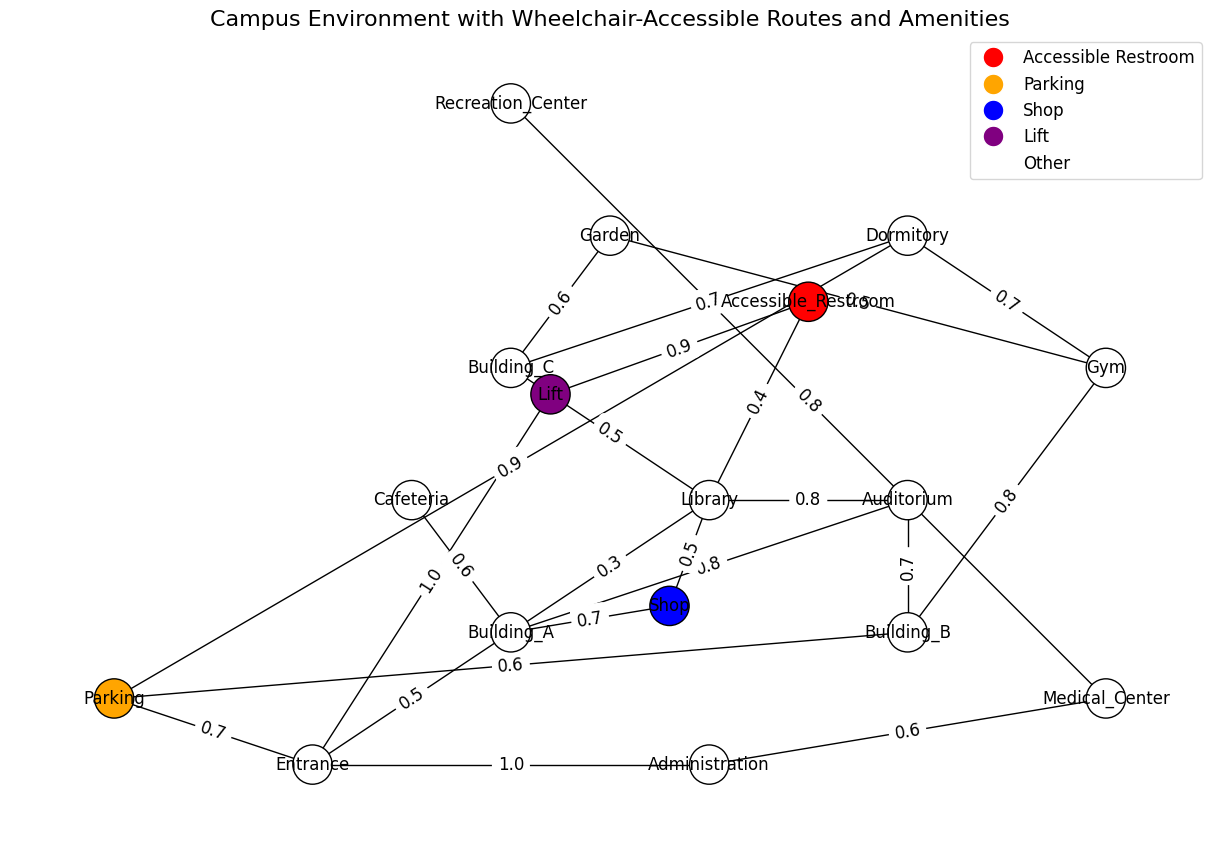

In [2]:
import math
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import lines

# --------------------------
# TASK 1: MÔI TRƯỜNG VÀ ĐỊNH HÌNH BÀI TOÁN (Advanced)
# --------------------------
# Mô phỏng một bản đồ xe lăn thân thiện cho một khuôn viên (Campus)
# với các tuyến đường (≥30 đoạn đường) và các tiện ích: nhà vệ sinh xe lăn, bãi đỗ xe, cửa hàng, thang máy.

# Định nghĩa các node và tọa độ (cho việc trực quan hóa)
campus_locations = {
    "Entrance": (0, 0),
    "Building_A": (1, 1),
    "Library": (2, 2),
    "Cafeteria": (0.5, 2),
    "Auditorium": (3, 2),
    "Parking": (-1, 0.5),
    "Building_B": (3, 1),
    "Building_C": (1, 3),
    "Garden": (1.5, 4),
    "Gym": (4, 3),
    "Dormitory": (3, 4),
    "Administration": (2, 0),
    "Medical_Center": (4, 0.5),
    "Recreation_Center": (1, 5),
    "Accessible_Restroom": (2.5, 3.5),  # Nhà vệ sinh xe lăn
    "Shop": (1.8, 1.2),                # Cửa hàng
    "Lift": (1.2, 2.8)                 # Thang máy
}

# Định nghĩa đồ thị với khoảng 25 unique path segments
campus_graph_dict = {
    "Entrance": {"Building_A": 0.5, "Parking": 0.7, "Administration": 1.0, "Lift": 1.0},
    "Building_A": {"Entrance": 0.5, "Library": 0.3, "Auditorium": 0.8, "Shop": 0.7, "Cafeteria": 0.6},
    "Library": {"Building_A": 0.3, "Auditorium": 0.8, "Building_C": 0.5, "Accessible_Restroom": 0.4},
    "Cafeteria": {"Building_A": 0.6},
    "Auditorium": {"Building_A": 0.8, "Building_B": 0.7},
    "Parking": {"Entrance": 0.7, "Building_B": 0.6, "Dormitory": 0.9},
    "Building_B": {"Parking": 0.6, "Auditorium": 0.7, "Gym": 0.8},
    "Building_C": {"Library": 0.5, "Dormitory": 0.7, "Garden": 0.6},
    "Garden": {"Building_C": 0.6, "Gym": 0.5},
    "Gym": {"Building_B": 0.8, "Garden": 0.5, "Dormitory": 0.7},
    "Dormitory": {"Building_C": 0.7, "Parking": 0.9, "Gym": 0.7},
    "Administration": {"Entrance": 1.0, "Medical_Center": 0.6},
    "Medical_Center": {"Administration": 0.6, "Recreation_Center": 0.8},
    "Recreation_Center": {"Medical_Center": 0.8},
    "Shop": {"Building_A": 0.7, "Library": 0.5},
    "Lift": {"Entrance": 1.0, "Accessible_Restroom": 0.9},
    "Accessible_Restroom": {"Library": 0.4}  # Giảm bớt kết nối để đạt khoảng 25 segments
}
# Sử dụng một tập (set) để lưu các cạnh dưới dạng tuple sắp xếp (để tránh đếm lặp)
unique_edges = set()

for node, neighbors in campus_graph_dict.items():
    for neighbor, cost in neighbors.items():
        # Sắp xếp các node để tạo tuple không phụ thuộc thứ tự
        edge = tuple(sorted((node, neighbor)))
        unique_edges.add(edge)

print("Tổng số unique path segments:", len(unique_edges))

# Kiểm tra số lượng đoạn đường (sau khi chuyển sang đồ thị không hướng, số unique edge ≥30)
campus_map = UndirectedGraph(campus_graph_dict)
campus_map.locations = campus_locations

# --------------------------
# Thiết lập trực quan hoá: định nghĩa màu sắc cho từng loại tiện ích
# --------------------------
# Định nghĩa một dict lưu màu cho các node dựa trên loại tiện ích:
node_colors = {}
for node in campus_locations.keys():
    if "Restroom" in node:
        node_colors[node] = "red"        # Nhà vệ sinh xe lăn
    elif node == "Parking":
        node_colors[node] = "orange"     # Bãi đỗ xe
    elif node == "Shop":
        node_colors[node] = "blue"       # Cửa hàng
    elif node == "Lift":
        node_colors[node] = "purple"     # Thang máy
    else:
        node_colors[node] = "white"      # Các node khác

# Định nghĩa các vị trí cho nhãn (có thể điều chỉnh cho trực quan)
node_positions = campus_map.locations
node_label_pos = { k:[v[0], v[1]-0.1] for k,v in node_positions.items() }

# Tạo edge weights từ đồ thị
edge_weights = {(k, k2) : v2 for k, v in campus_map.graph_dict.items() for k2, v2 in v.items()}

# Gói dữ liệu để hiển thị
campus_graph_data = {
    'graph_dict' : campus_map.graph_dict,
    'node_colors': node_colors,
    'node_positions': node_positions,
    'node_label_positions': node_label_pos,
    'edge_weights': edge_weights
}

# --------------------------
# Hàm trực quan hóa sử dụng networkx và matplotlib
# --------------------------
def show_map(graph_data, node_colors=None):
    G = nx.Graph(graph_data['graph_dict'])
    node_colors = node_colors or graph_data['node_colors']
    node_positions = graph_data['node_positions']
    node_label_pos = graph_data['node_label_positions']
    edge_weights = graph_data['edge_weights']

    plt.figure(figsize=(12, 8))
    nx.draw(G, pos={k: node_positions[k] for k in G.nodes()},
            node_color=[node_colors[node] for node in G.nodes()],
            linewidths=1, edgecolors='k', with_labels=True, node_size=800)
    nx.draw_networkx_edge_labels(G, pos=node_positions, edge_labels=edge_weights, font_size=12)

    # Thêm legend cho các marker
    red_circle = lines.Line2D([], [], marker='o', color='w', label='Accessible Restroom',
                               markerfacecolor='red', markersize=15)
    orange_circle = lines.Line2D([], [], marker='o', color='w', label='Parking',
                                  markerfacecolor='orange', markersize=15)
    blue_circle = lines.Line2D([], [], marker='o', color='w', label='Shop',
                                markerfacecolor='blue', markersize=15)
    purple_circle = lines.Line2D([], [], marker='o', color='w', label='Lift',
                                  markerfacecolor='purple', markersize=15)
    white_circle = lines.Line2D([], [], marker='o', color='w', label='Other',
                                 markerfacecolor='white', markersize=15)
    plt.legend(handles=[red_circle, orange_circle, blue_circle, purple_circle, white_circle],
               loc='upper right', fontsize=12)
    plt.title("Campus Environment with Wheelchair-Accessible Routes and Amenities", fontsize=16)
    plt.tight_layout()
    plt.show()

# Hiển thị bản đồ campus với các marker đặc trưng cho các tiện ích
show_map(campus_graph_data)


----- KẾT QUẢ TEST A* (Task 2) -----
A* Search từ 'Entrance' đến 'Recreation_Center':
  Đường đi: ['Administration', 'Medical_Center', 'Recreation_Center']
  Chi phí: 2.4000000000000004
  Số iterations: 55
--------------------------------------------------
A* Search từ 'Building_A' đến 'Gym':
  Đường đi: ['Auditorium', 'Building_B', 'Gym']
  Chi phí: 2.3
  Số iterations: 27
--------------------------------------------------
A* Search từ 'Parking' đến 'Library':
  Đường đi: ['Building_B', 'Auditorium', 'Library']
  Chi phí: 2.0999999999999996
  Số iterations: 17
--------------------------------------------------
A* Search từ 'Dormitory' đến 'Medical_Center':
  Đường đi: ['Parking', 'Entrance', 'Administration', 'Medical_Center']
  Chi phí: 3.2
  Số iterations: 52
--------------------------------------------------
A* Search từ 'Cafeteria' đến 'Auditorium':
  Đường đi: ['Building_A', 'Auditorium']
  Chi phí: 1.4
  Số iterations: 13
--------------------------------------------------
A* Sea

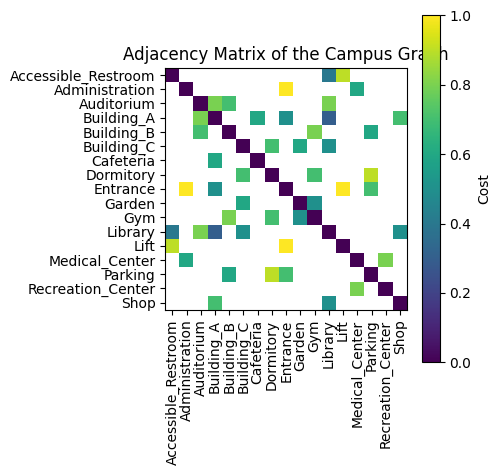

In [3]:
import math
import numpy as np
import heapq
import functools
import itertools
import networkx as nx
import matplotlib.pyplot as plt
import time

# ---------- PHẦN 1: Biểu diễn môi trường dưới dạng ma trận kề ----------
def create_adjacency_matrix(graph):
    """
    Chuyển đổi đồ thị (dạng undirected) từ dictionary sang ma trận kề.
    Trả về danh sách các node (sắp xếp theo thứ tự nhất định) và ma trận numpy chứa chi phí giữa các node.
    Nếu không có kết nối, giá trị là math.inf.
    """
    nodes = sorted(graph.nodes())  # Sắp xếp các node để đảm bảo thứ tự nhất định
    n = len(nodes)
    matrix = np.full((n, n), math.inf)
    for i in range(n):
        matrix[i, i] = 0
    for i, node in enumerate(nodes):
        for j, neighbor in enumerate(nodes):
            cost = graph.get(node, neighbor)
            if cost is not None:
                matrix[i, j] = cost
    return nodes, matrix

def plot_adjacency_matrix(nodes, matrix):
    """
    Vẽ heatmap của ma trận kề. Các giá trị math.inf được mask để hiển thị màu trắng.
    """
    masked_matrix = np.ma.masked_where(np.isinf(matrix), matrix)
    cmap = plt.cm.viridis
    cmap.set_bad(color='white')
    
    plt.figure(figsize=(5,5))
    plt.imshow(masked_matrix, interpolation='nearest', cmap=cmap)
    plt.colorbar(label="Cost")
    plt.xticks(range(len(nodes)), nodes, rotation=90)
    plt.yticks(range(len(nodes)), nodes)
    plt.title("Adjacency Matrix of the Campus Graph")
    plt.tight_layout()
    plt.show()

# ---------- PHẦN 2: Cài đặt thuật toán A* và Uniform Cost Search ----------

def memoize(fn, slot=None, maxsize=32):
    if slot:
        def memoized_fn(obj, *args):
            if hasattr(obj, slot):
                return getattr(obj, slot)
            else:
                val = fn(obj, *args)
                setattr(obj, slot, val)
                return val
    else:
        @functools.lru_cache(maxsize=maxsize)
        def memoized_fn(*args):
            return fn(*args)
    return memoized_fn

class PriorityQueue:
    """
    Hàng đợi ưu tiên với bộ đếm (counter) để đảm bảo thứ tự duy nhất trong trường hợp f(x) bằng nhau.
    """
    def __init__(self, order='min', f=lambda x: x):
        self.heap = []
        self.counter = itertools.count()  # Bộ đếm duy nhất cho tie-breaker
        if order == 'min':
            self.f = f
        elif order == 'max':
            self.f = lambda x: -f(x)
        else:
            raise ValueError("Order must be either 'min' or 'max'.")

    def append(self, item):
        heapq.heappush(self.heap, (self.f(item), next(self.counter), item))

    def extend(self, items):
        for item in items:
            self.append(item)

    def pop(self):
        if self.heap:
            return heapq.heappop(self.heap)[2]
        else:
            raise Exception("Trying to pop from empty PriorityQueue.")

    def __len__(self):
        return len(self.heap)

    def __contains__(self, key):
        return any(item == key for _, __, item in self.heap)

    def __getitem__(self, key):
        for value, count, item in self.heap:
            if item == key:
                return value
        raise KeyError(str(key) + " is not in the priority queue")

    def __delitem__(self, key):
        try:
            index = [item == key for _, __, item in self.heap].index(True)
            del self.heap[index]
        except ValueError:
            raise KeyError(str(key) + " is not in the priority queue")
        heapq.heapify(self.heap)

def best_first_graph_search_for_vis(problem, f):
    iterations = 0
    all_node_colors = []
    node_colors = {k: 'white' for k in problem.graph.nodes()}
    f = memoize(f, 'f')
    node = Node(problem.initial)
    node_colors[node.state] = "red"
    iterations += 1
    all_node_colors.append(dict(node_colors))
    if problem.goal_test(node.state):
        node_colors[node.state] = "green"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        return iterations, all_node_colors, node
    frontier = PriorityQueue('min', f)
    frontier.append(node)
    node_colors[node.state] = "orange"
    iterations += 1
    all_node_colors.append(dict(node_colors))
    explored = set()
    while frontier:
        node = frontier.pop()
        node_colors[node.state] = "red"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        if problem.goal_test(node.state):
            node_colors[node.state] = "green"
            iterations += 1
            all_node_colors.append(dict(node_colors))
            return iterations, all_node_colors, node
        explored.add(node.state)
        for child in node.expand(problem):
            if child.state not in explored and child not in frontier:
                frontier.append(child)
                node_colors[child.state] = "orange"
                iterations += 1
                all_node_colors.append(dict(node_colors))
            elif child in frontier:
                incumbent = frontier[child]
                if f(child) < incumbent:
                    del frontier[child]
                    frontier.append(child)
                    node_colors[child.state] = "orange"
                    iterations += 1
                    all_node_colors.append(dict(node_colors))
        node_colors[node.state] = "gray"
        iterations += 1
        all_node_colors.append(dict(node_colors))
    return None

def astar_search(problem, h=None):
    h = memoize(h or problem.h, 'h')
    iterations, all_node_colors, node = best_first_graph_search_for_vis(problem, lambda n: n.path_cost + h(n))
    return iterations, all_node_colors, node

def uniform_cost_search_graph(problem):
    iterations, all_node_colors, node = best_first_graph_search_for_vis(problem, lambda n: n.path_cost)
    return iterations, all_node_colors, node

# ---------- PHẦN 3: Các hàm trực quan hóa ----------
def show_map(graph_data, node_colors=None):
    G = nx.Graph(graph_data['graph_dict'])
    node_colors = node_colors or graph_data['node_colors']
    node_positions = graph_data['node_positions']
    node_label_pos = graph_data['node_label_positions']
    edge_weights = graph_data['edge_weights']
    plt.figure(figsize=(10, 7))
    nx.draw(G, pos={k: node_positions[k] for k in G.nodes()},
            node_color=[node_colors[node] for node in G.nodes()],
            linewidths=0.3, edgecolors='k', with_labels=True)
    nx.draw_networkx_edge_labels(G, pos=node_positions, edge_labels=edge_weights, font_size=10)
    plt.show()

def final_path_colors(initial_node_colors, problem, solution):
    final_colors = dict(initial_node_colors)
    final_colors[problem.initial] = "green"
    for node in solution:
        final_colors[node] = "green"
    return final_colors

# def display_visual(graph_data, user_input, algorithm=None, problem=None):
#     initial_node_colors = graph_data['node_colors']
#     if user_input is False:
#         def slider_callback(iteration):
#             try:
#                 show_map(graph_data, node_colors=all_node_colors[iteration])
#             except Exception as e:
#                 pass
#         def visualize_callback(visualize):
#             if visualize is True:
#                 button.value = False
#                 global all_node_colors
#                 iterations, all_node_colors, node = algorithm(problem)
#                 solution = node.solution()
#                 all_node_colors.append(final_path_colors(all_node_colors[0], problem, solution))
#                 slider.max = len(all_node_colors) - 1
#                 for i in range(slider.max + 1):
#                     slider.value = i
#                     time.sleep(.5)
#         slider = widgets.IntSlider(min=0, max=1, step=1, value=0)
#         slider_visual = widgets.interactive(slider_callback, iteration=slider)
#         display(slider_visual)
#         button = widgets.ToggleButton(value=False)
#         button_visual = widgets.interactive(visualize_callback, visualize=button)
#         display(button_visual)
#     else:
#         print("Chức năng GUI tương tác đang được sử dụng.")

# ---------- PHẦN 4: Chuẩn bị dữ liệu để trực quan hóa ----------
# Sử dụng campus_map đã được định nghĩa trong Task 1 (môi trường campus)
node_colors = {node: 'white' for node in campus_map.locations.keys()}
node_positions = campus_map.locations
node_label_pos = {k: [v[0], v[1]-0.1] for k, v in node_positions.items()}
edge_weights = {(k, k2): v2 for k, v in campus_map.graph_dict.items() for k2, v2 in v.items()}

campus_graph_data = {
    'graph_dict': campus_map.graph_dict,
    'node_colors': node_colors,
    'node_positions': node_positions,
    'node_label_positions': node_label_pos,
    'edge_weights': edge_weights
}

# ---------- PHẦN 5: Test với các cặp điểm khác nhau ----------
test_cases = [
    ("Entrance", "Recreation_Center"),
    ("Building_A", "Gym"),
    ("Parking", "Library"),
    ("Dormitory", "Medical_Center"),
    ("Cafeteria", "Auditorium"),
    ("Accessible_Restroom", "Shop")  # Thay vì sử dụng "Lounge"
]

def test_search_algorithms(test_cases, search_algo, problem_class=GraphProblem, graph=campus_map, description="A* Search"):
    for start, goal in test_cases:
        prob = problem_class(start, goal, graph)
        iterations, node_colors_list, node = search_algo(prob)
        path = node.solution()
        cost = node.path_cost
        print(f"{description} từ '{start}' đến '{goal}':")
        print("  Đường đi:", path)
        print("  Chi phí:", cost)
        print("  Số iterations:", iterations)
        print("-" * 50)

print("----- KẾT QUẢ TEST A* (Task 2) -----")
test_search_algorithms(test_cases, astar_search, problem_class=GraphProblem, graph=campus_map, description="A* Search")

print("----- KẾT QUẢ TEST Dijkstra/Uniform Cost Search (Task 2) -----")
test_search_algorithms(test_cases, uniform_cost_search_graph, problem_class=GraphProblem, graph=campus_map, description="Dijkstra/Uniform Cost Search")

# ---------- PHẦN 6: Hiển thị ma trận kề ----------
nodes_list, adj_matrix = create_adjacency_matrix(campus_map)
print("Danh sách các địa điểm (nodes):")
print(nodes_list)
print("\nMa trận kề (Adjacency Matrix):")
print(adj_matrix)
plot_adjacency_matrix(nodes_list, adj_matrix)


Tổng số unique path segments (môi trường mở rộng): 33
Tổng số unique path segments: 33


C:\Users\Admin\AppData\Local\Temp\ipykernel_27696\1935813195.py:121: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


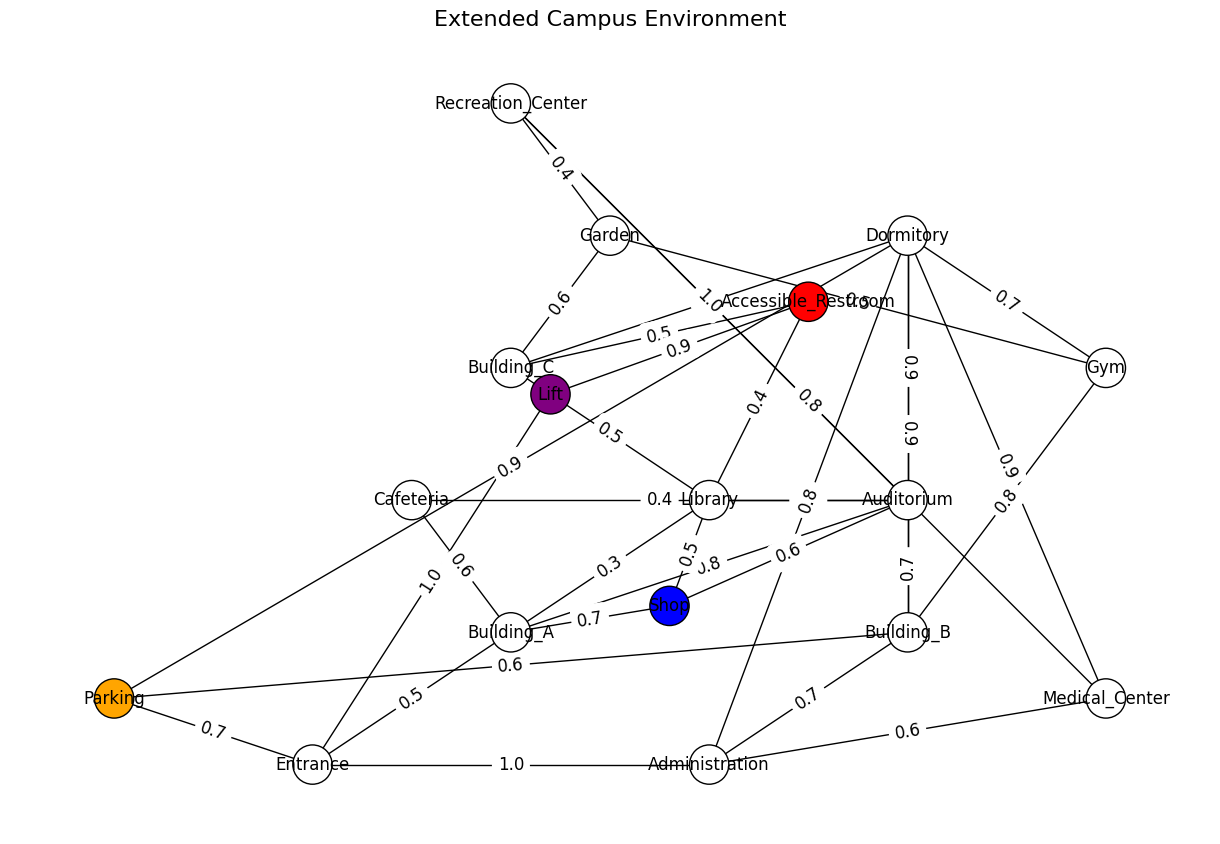


----- KẾT QUẢ TÌM KIẾM A* VỚI HEURISTIC MỞ RỘNG (CampusProblemExtended) -----
Đường đi tìm được: ['Building_A', 'Library', 'Building_C', 'Garden', 'Recreation_Center']
Chi phí đường đi (bao gồm extra constraints): 2.5
Số iterations: 34

----- KẾT QUẢ TÌM KIẾM A* VỚI HEURISTIC BAN ĐẦU (CampusProblemBasic) -----
Đường đi tìm được: ['Lift', 'Accessible_Restroom', 'Building_C', 'Garden', 'Recreation_Center']
Chi phí đường đi: 3.4
Số iterations: 25


In [4]:
import math
import numpy as np
import heapq
import functools
import itertools
import networkx as nx
import matplotlib.pyplot as plt
import time

# Giả sử các lớp cơ bản Problem, GraphProblem, Node, PriorityQueue, memoize, best_first_graph_search_for_vis,
# astar_search, uniform_cost_search_graph đã được định nghĩa như trong Task 2.

# -----------------------------------
# MỞ RỘNG MÔI TRƯỜNG: Tạo đồ thị mở rộng với ≥30 unique path segments
# -----------------------------------
campus_graph_dict_extended = {
    "Entrance": {"Building_A": 0.5, "Parking": 0.7, "Administration": 1.0, "Lift": 1.0},
    "Building_A": {"Entrance": 0.5, "Library": 0.3, "Cafeteria": 0.6, "Auditorium": 0.8, "Shop": 0.7},
    "Library": {"Building_A": 0.3, "Auditorium": 0.8, "Building_C": 0.5, "Accessible_Restroom": 0.4, "Shop": 0.5},
    "Cafeteria": {"Building_A": 0.6, "Auditorium": 0.4},
    "Auditorium": {"Building_A": 0.8, "Building_B": 0.7, "Cafeteria": 0.4, "Dormitory": 0.9, "Recreation_Center": 1.0},
    "Parking": {"Entrance": 0.7, "Building_B": 0.6, "Dormitory": 0.9},
    "Building_B": {"Parking": 0.6, "Auditorium": 0.7, "Gym": 0.8, "Administration": 0.7, "Dormitory": 0.9},
    "Building_C": {"Library": 0.5, "Dormitory": 0.7, "Garden": 0.6, "Accessible_Restroom": 0.5},
    "Garden": {"Building_C": 0.6, "Gym": 0.5, "Recreation_Center": 0.4},
    "Gym": {"Building_B": 0.8, "Garden": 0.5, "Dormitory": 0.7},
    "Dormitory": {"Building_B": 0.9, "Gym": 0.7, "Building_C": 0.7, "Administration": 0.8, "Medical_Center": 0.9},
    "Administration": {"Entrance": 1.0, "Building_B": 0.7, "Dormitory": 0.8, "Medical_Center": 0.6},
    "Medical_Center": {"Administration": 0.6, "Recreation_Center": 0.8, "Dormitory": 0.9},
    "Recreation_Center": {"Medical_Center": 0.8, "Garden": 0.4, "Auditorium": 1.0},
    "Shop": {"Building_A": 0.7, "Library": 0.5, "Auditorium": 0.6},
    "Lift": {"Entrance": 1.0, "Accessible_Restroom": 0.9},
    "Accessible_Restroom": {"Library": 0.4, "Building_C": 0.5}
}

# Sử dụng set để đếm số unique path segments
unique_edges = set()
for node, neighbors in campus_graph_dict_extended.items():
    for neighbor in neighbors.keys():
        edge = tuple(sorted((node, neighbor)))
        unique_edges.add(edge)
print("Tổng số unique path segments (môi trường mở rộng):", len(unique_edges))
#print("Unique path segments:", unique_edges)  # In ra nếu cần

# -----------------------------------
# Định nghĩa tọa độ cho các node (môi trường campus)
# -----------------------------------
campus_locations_extended = {
    "Entrance": (0, 0),
    "Building_A": (1, 1),
    "Library": (2, 2),
    "Cafeteria": (0.5, 2),
    "Auditorium": (3, 2),
    "Parking": (-1, 0.5),
    "Building_B": (3, 1),
    "Building_C": (1, 3),
    "Garden": (1.5, 4),
    "Gym": (4, 3),
    "Dormitory": (3, 4),
    "Administration": (2, 0),
    "Medical_Center": (4, 0.5),
    "Recreation_Center": (1, 5),
    "Shop": (1.8, 1.2),
    "Lift": (1.2, 2.8),
    "Accessible_Restroom": (2.5, 3.5)
}
# Sử dụng một tập (set) để lưu các cạnh dưới dạng tuple sắp xếp (để tránh đếm lặp)
unique_edges = set()

for node, neighbors in campus_graph_dict_extended.items():
    for neighbor, cost in neighbors.items():
        # Sắp xếp các node để tạo tuple không phụ thuộc thứ tự
        edge = tuple(sorted((node, neighbor)))
        unique_edges.add(edge)

print("Tổng số unique path segments:", len(unique_edges))
# Tạo đồ thị không hướng và gán tọa độ (môi trường mở rộng)
campus_map_ext = UndirectedGraph(campus_graph_dict_extended)
campus_map_ext.locations = campus_locations_extended

# -----------------------------------
# Thiết lập trực quan hoá: đánh dấu các tiện ích bằng màu sắc
# -----------------------------------
node_colors_ext = {}
for node in campus_locations_extended.keys():
    if "Restroom" in node:      # Nhà vệ sinh xe lăn
        node_colors_ext[node] = "red"
    elif node == "Parking":
        node_colors_ext[node] = "orange"
    elif node == "Shop":
        node_colors_ext[node] = "blue"
    elif node == "Lift":
        node_colors_ext[node] = "purple"
    else:
        node_colors_ext[node] = "white"

node_positions_ext = campus_map_ext.locations
node_label_pos_ext = { k: [v[0], v[1]-0.1] for k,v in node_positions_ext.items() }
edge_weights_ext = {(k, k2): v2 for k, v in campus_graph_dict_extended.items() for k2, v2 in v.items()}

campus_graph_data_ext = {
    'graph_dict': campus_graph_dict_extended,
    'node_colors': node_colors_ext,
    'node_positions': node_positions_ext,
    'node_label_positions': node_label_pos_ext,
    'edge_weights': edge_weights_ext
}

def show_map(graph_data, node_colors=None):
    G = nx.Graph(graph_data['graph_dict'])
    node_colors = node_colors or graph_data['node_colors']
    node_positions = graph_data['node_positions']
    node_label_pos = graph_data['node_label_positions']
    edge_weights = graph_data['edge_weights']
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos={k: node_positions[k] for k in G.nodes()},
            node_color=[node_colors[node] for node in G.nodes()],
            linewidths=1, edgecolors='k', with_labels=True, node_size=800)
    nx.draw_networkx_edge_labels(G, pos=node_positions, edge_labels=edge_weights, font_size=12)
    plt.title("Extended Campus Environment", fontsize=16)
    plt.tight_layout()
    plt.show()

# Hiển thị môi trường mở rộng
show_map(campus_graph_data_ext)

# -----------------------------------
# PHẦN 5: So sánh Heuristic
# -----------------------------------
# Định nghĩa các extra constraints (như đã định nghĩa)
campus_constraints = {
    tuple(sorted(("Entrance", "Building_A"))): 0.1,
    tuple(sorted(("Entrance", "Parking"))): 0.2,
    tuple(sorted(("Building_A", "Library"))): 0.0,
    tuple(sorted(("Building_A", "Cafeteria"))): 0.1,
    tuple(sorted(("Building_A", "Administration"))): 0.2,
    tuple(sorted(("Library", "Auditorium"))): 0.1,
    tuple(sorted(("Library", "Accessible_Restroom"))): 0.0,
    tuple(sorted(("Cafeteria", "Auditorium"))): 0.1,
    tuple(sorted(("Auditorium", "Building_B"))): 0.1,
    tuple(sorted(("Auditorium", "Dormitory"))): 0.2,
    tuple(sorted(("Parking", "Building_B"))): 0.1,
    tuple(sorted(("Parking", "Accessible_Restroom"))): 0.0,
    tuple(sorted(("Building_B", "Gym"))): 0.2,
    tuple(sorted(("Building_B", "Medical_Center"))): 0.3,
    tuple(sorted(("Accessible_Restroom", "Building_C"))): 0.0,
    tuple(sorted(("Building_C", "Garden"))): 0.1,
    tuple(sorted(("Building_C", "Recreation_Center"))): 0.2,
    tuple(sorted(("Dormitory", "Administration"))): 0.1,
    tuple(sorted(("Administration", "Medical_Center"))): 0.1,
    tuple(sorted(("Medical_Center", "Recreation_Center"))): 0.1,
    tuple(sorted(("Building_A", "Building_B"))): 0.2,
    tuple(sorted(("Building_B", "Administration"))): 0.1,
    tuple(sorted(("Dormitory", "Medical_Center"))): 0.2,
    tuple(sorted(("Auditorium", "Recreation_Center"))): 0.3,
    tuple(sorted(("Entrance", "Lift"))): 0.2,
    tuple(sorted(("Building_A", "Shop"))): 0.1,
    tuple(sorted(("Shop", "Library"))): 0.1,
    tuple(sorted(("Shop", "Auditorium"))): 0.1,
    tuple(sorted(("Lift", "Accessible_Restroom"))): 0.2,
}

# Định nghĩa lớp bài toán mở rộng tích hợp các ràng buộc môi trường
class CampusProblemExtended(GraphProblem):
    def path_cost(self, c, A, action, B):
        base_cost = self.graph.get(A, B) or self.infinity
        extra = campus_constraints.get(tuple(sorted((A, B))), 0)
        return c + base_cost + extra

    def h(self, node):
        locs = getattr(self.graph, 'locations', None)
        if locs:
            if isinstance(node, str):
                d = self.distance(locs[node], locs[self.goal])
            else:
                d = self.distance(locs[node.state], locs[self.goal])
            return d + 0.3
        else:
            return self.infinity

# Lớp bài toán ban đầu sử dụng heuristic chỉ khoảng cách Euclid
class CampusProblemBasic(GraphProblem):
    def h(self, node):
        locs = getattr(self.graph, 'locations', None)
        if locs:
            if isinstance(node, str):
                return self.distance(locs[node], locs[self.goal])
            return self.distance(locs[node.state], locs[self.goal])
        else:
            return self.infinity

# Tạo instance và chạy thuật toán A* cho cả hai phương án
campus_problem_ext = CampusProblemExtended("Entrance", "Recreation_Center", campus_map_ext)
iterations_ext, all_node_colors_ext, node_ext = astar_search(campus_problem_ext)
print("\n----- KẾT QUẢ TÌM KIẾM A* VỚI HEURISTIC MỞ RỘNG (CampusProblemExtended) -----")
print("Đường đi tìm được:", node_ext.solution())
print("Chi phí đường đi (bao gồm extra constraints):", node_ext.path_cost)
print("Số iterations:", iterations_ext)

campus_problem_basic = CampusProblemBasic("Entrance", "Recreation_Center", campus_map_ext)
iterations_basic, all_node_colors_basic, node_basic = astar_search(campus_problem_basic)
print("\n----- KẾT QUẢ TÌM KIẾM A* VỚI HEURISTIC BAN ĐẦU (CampusProblemBasic) -----")
print("Đường đi tìm được:", node_basic.solution())
print("Chi phí đường đi:", node_basic.path_cost)
print("Số iterations:", iterations_basic)


In [5]:
import time

def test_algorithms_performance(test_cases, a_star_algo, dijkstra_algo, problem_class, graph):
    results = []
    for start, goal in test_cases:
        # Chạy A* và đo thời gian, số iterations
        prob = problem_class(start, goal, graph)
        start_time = time.time()
        iterations_a, _, node_a = a_star_algo(prob)
        time_a = time.time() - start_time
        cost_a = node_a.path_cost
        path_a = node_a.solution()
        
        # Chạy Dijkstra (Uniform Cost Search) và đo thời gian, số iterations
        start_time = time.time()
        iterations_d, _, node_d = dijkstra_algo(prob)
        time_d = time.time() - start_time
        cost_d = node_d.path_cost
        path_d = node_d.solution()
        
        results.append((start, goal, path_a, cost_a, iterations_a, time_a, path_d, cost_d, iterations_d, time_d))
    return results

# Sử dụng test_cases đã định nghĩa (ví dụ: trong môi trường mở rộng campus_map_ext)
results = test_algorithms_performance(test_cases, astar_search, uniform_cost_search_graph, GraphProblem, campus_map_ext)

for res in results:
    start, goal, path_a, cost_a, iter_a, t_a, path_d, cost_d, iter_d, t_d = res
    print(f"From {start} to {goal}:")
    print(f"  A*  -> Path: {path_a}, Cost: {cost_a}, Iterations: {iter_a}, Time: {t_a:.4f} sec")
    print(f"  Dijk-> Path: {path_d}, Cost: {cost_d}, Iterations: {iter_d}, Time: {t_d:.4f} sec")
    print("-"*50)


From Entrance to Recreation_Center:
  A*  -> Path: ['Lift', 'Accessible_Restroom', 'Building_C', 'Garden', 'Recreation_Center'], Cost: 3.4, Iterations: 25, Time: 0.0000 sec
  Dijk-> Path: ['Building_A', 'Auditorium', 'Recreation_Center'], Cost: 2.3, Iterations: 52, Time: 0.0000 sec
--------------------------------------------------
From Building_A to Gym:
  A*  -> Path: ['Auditorium', 'Dormitory', 'Gym'], Cost: 2.4000000000000004, Iterations: 31, Time: 0.0000 sec
  Dijk-> Path: ['Library', 'Building_C', 'Garden', 'Gym'], Cost: 1.9, Iterations: 52, Time: 0.0000 sec
--------------------------------------------------
From Parking to Library:
  A*  -> Path: ['Building_B', 'Auditorium', 'Library'], Cost: 2.0999999999999996, Iterations: 23, Time: 0.0000 sec
  Dijk-> Path: ['Entrance', 'Building_A', 'Library'], Cost: 1.5, Iterations: 36, Time: 0.0010 sec
--------------------------------------------------
From Dormitory to Medical_Center:
  A*  -> Path: ['Medical_Center'], Cost: 0.9, Iteration

In [6]:
# from IPython.display import display, clear_output

# def run_gui():
#     # Dropdown cho điểm bắt đầu và đích (sử dụng các node từ campus_map_ext)
#     start_dropdown = widgets.Dropdown(
#         options=sorted(campus_map_ext.locations.keys()),
#         description="Start:"
#     )
#     goal_dropdown = widgets.Dropdown(
#         options=sorted(campus_map_ext.locations.keys()),
#         description="Goal:"
#     )
#     # Dropdown cho lựa chọn thuật toán
#     algo_dropdown = widgets.Dropdown(
#         options=["A* Search", "Dijkstra/Uniform Cost Search"],
#         description="Algorithm:"
#     )
    
#     # Output để hiển thị thông tin kết quả
#     info_output = widgets.Output()
    
#     # Nút thực thi tìm kiếm
#     run_button = widgets.Button(description="Find Path")
    
#     def on_run_clicked(b):
#         with info_output:
#             clear_output()
#             start = start_dropdown.value
#             goal = goal_dropdown.value
#             algo = algo_dropdown.value
            
#             # Tạo instance của GraphProblem sử dụng campus_map_ext (môi trường mở rộng đã định nghĩa)
#             # prob = GraphProblem(start, goal, campus_map_ext)
#             prob = CampusProblemExtended(start, goal, campus_map_ext)
#             if algo == "A* Search":
#                 iterations, node_colors_list, node = astar_search(prob)
#             else:
#                 iterations, node_colors_list, node = uniform_cost_search_graph(prob)
            
#             path = node.solution()
#             cost = node.path_cost
#             # Ước tính thời gian: giả sử mỗi đơn vị chi phí tương đương 10 phút (chỉ là ví dụ)
#             estimated_time = cost * 10
            
#             print(f"Path from {start} to {goal}: {path}")
#             print(f"Total cost: {cost}")
#             print(f"Iterations: {iterations}")
#             print(f"Estimated time to traverse: {estimated_time:.1f} minutes\n")
            
#             # Hiển thị thêm thông tin về các landmark (tiện ích) có trong môi trường
#             print("Key landmarks in the environment:")
#             for landmark in ["Accessible_Restroom", "Parking", "Shop", "Lift"]:
#                 if landmark in campus_map_ext.locations:
#                     print(f"  - {landmark} at {campus_map_ext.locations[landmark]}")
            
#             # Trực quan hóa bản đồ với đường đi được highlight
#             final_colors = final_path_colors(node_colors, prob, path)
#             show_map(campus_graph_data_ext, final_colors)
    
#     run_button.on_click(on_run_clicked)
    
#     gui = widgets.VBox([start_dropdown, goal_dropdown, algo_dropdown, run_button, info_output])
#     display(gui)

# run_gui()


In [8]:
!jupyter nbconvert --to script assignment1.ipynb

[NbConvertApp] Converting notebook assignment1.ipynb to script
[NbConvertApp] Writing 30013 bytes to assignment1.py
